# Random Forest x IRIS 

In [73]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
#autres

### Importer le dataset IRIS 

In [74]:
from sklearn.datasets import load_iris
iris = load_iris()

### Faite un dataFrame et renommer les colonnes 

In [75]:
#iris.feature_names = ['sepal length', 'sepal width', 'petal length', 'petal width']
#df = DataFrame(iris.data, columns=iris.feature_names, index=pd.Index([i for i in range(iris.data.shape[0])])).join(DataFrame(iris.target, columns=pd.Index(["species"]), index=pd.Index([i for i in range(iris.target.shape[0])])))

df = DataFrame({
    'sepal length':iris.data[:,0],
    'sepal width':iris.data[:,1],
    'petal length':iris.data[:,2],
    'petal width':iris.data[:,3],
    'species':iris.target
})

df.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Définir les variables features et la target & effectuer un split 

In [76]:
X = df[['sepal length', 'sepal width', 'petal length', 'petal width']]  # Features
Y = df['species']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3)
print(X_train.shape,",",y_train.shape,",",X_test.shape,",",y_test.shape)

(105, 4) , (105,) , (45, 4) , (45,)


### Entrainer le classifieur 

In [77]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100)
clf = clf.fit(X_train, y_train)

### Afficher l'accuracy de votre classifieurs 

In [78]:
#Accuracy : 0.9555555555555556
from sklearn.metrics import accuracy_score

y_pred = clf.predict(X_test)
score = accuracy_score(y_test, y_pred)
#score = tree_clf.score(X_test, y_test)

print("Accuracy :", score)

Accuracy : 0.9555555555555556


### Analyser votre classifieur, que voyez vous ? 

In [79]:
#RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            #max_depth=None, max_features='auto', max_leaf_nodes=None,
            #min_impurity_decrease=0.0, min_impurity_split=None,
            #min_samples_leaf=1, min_samples_split=2,
            #min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            #oob_score=False, random_state=None, verbose=0,
            #warm_start=False)
clf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### Afficher les features importances

In [80]:
#petal width (cm)     0.501632
#petal length (cm)    0.379573
#sepal length (cm)    0.096711
#sepal width (cm)     0.022084
#dtype: float64

feature_imp = pd.Series(clf.feature_importances_,index=iris.feature_names).sort_values(ascending=False)
feature_imp

petal length (cm)    0.442740
petal width (cm)     0.427041
sepal length (cm)    0.108146
sepal width (cm)     0.022073
dtype: float64

### Afficher graphiquement les features importances  

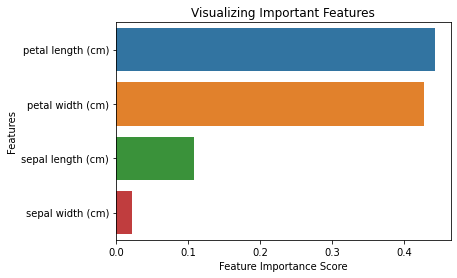

In [81]:
import seaborn as sns

# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

### Entrainer votre classifieurs avec moins de features

In [82]:
X = df[['petal length', 'petal width','sepal length']]  # Removed the least important feature "sepal width"
Y = df['species']                                       

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.70, random_state=5) # 70% training and 30% test

clf=RandomForestClassifier(n_estimators=100)

clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

### Que constatez vous ? 

In [83]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9523809523809523
